#### Thinking1:既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？

- 因为内容过滤算法忽视了用户行为，从而也忽视了物品的流行度以及用户行为中所包含的规律，由于考虑的物品的相似性一段时间不会改变，因此可以很容易的离线计算，准确度一般也可以接受，结果的新颖度比较高，但是它的精度比较低。


#### Thinking2:你需要推荐系统么？哪些情况下不需要推荐系统？

- 我需要推荐系统需要满足两个条件：
  - 第一是存在信息过载，难以找到想要的内容；
  - 第二是用当我大部分时候没有明确的需求，好的推荐系统不仅仅能预测用户的行为，更需要帮助用户发现自己的需求、自己可能感兴趣的东西
- 以下情况下不需要推荐系统：
  - 在用户数量没有达到一定的规模的时候，并不是一定要采用推荐系统

#### Thinking3:如果给一个视频打标签，视频中所有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？

- 可能存在背景音乐和视频内容关联性差，甚至毫不相关的情况

#### Action1:使用CART算法对MINIST进行训练

In [76]:
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 

In [77]:
# 加载数据
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [78]:
# 数据探索
data = digits.data
target = digits.target
data.shape

(1797, 64)

In [79]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [80]:
digits.target[0]

0

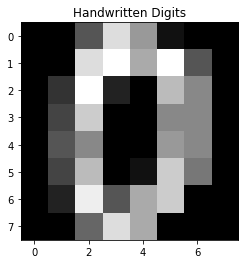

In [81]:
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

In [82]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x,train_y, test_y = train_test_split(data, target, test_size = 0.25,random_state = 33)

In [83]:
# 采用  规范化
ss = preprocessing.MinMaxScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.fit_transform(test_x)

In [84]:
# 创建 CART 决策树 分类器
model = DecisionTreeClassifier(max_depth = 500,random_state = 0)
model.fit(train_ss_x, train_y)
predict_y = model.predict(test_ss_x)
print('CART 的准确率：%.4lf'%accuracy_score(predict_y,test_y))

# 引入 k 折交叉验证
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model,train_ss_x,train_y,cv = 10)
acc.mean()

CART 的准确率：0.8644


0.8397014925373135

#### Action2:员工离职预测

In [530]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import xgboost as xgb 
from xgboost import plot_importance
from sklearn.model_selection import train_test_split 

In [531]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [532]:
train['Attrition'].value_counts()

No     988
Yes    188
Name: Attrition, dtype: int64

In [533]:
train.isna().sum()

user_id                     0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [534]:
train

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,Y,No,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,Y,No,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Y,Yes,14,3,4,80,0,1,4,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,763,34,No,Travel_Rarely,1333,Sales,10,4,Life Sciences,1,1055,3,Female,87,3,1,Sales Representative,3,Married,2220,18410,1,Y,Yes,19,3,4,80,1,1,2,3,1,1,0,0
1172,835,35,No,Travel_Rarely,528,Human Resources,8,4,Technical Degree,1,1164,3,Male,100,3,1,Human Resources,3,Single,4323,7108,1,Y,No,17,3,2,80,0,6,2,1,5,4,1,4
1173,1216,43,No,Travel_Rarely,1179,Sales,2,3,Medical,1,1706,4,Male,73,3,2,Sales Executive,4,Married,7847,6069,1,Y,Yes,17,3,1,80,1,10,3,3,10,9,8,8
1174,559,38,No,Travel_Rarely,268,Research & Development,2,5,Medical,1,773,4,Male,92,3,1,Research Scientist,3,Married,3057,20471,6,Y,Yes,13,3,2,80,1,6,0,1,1,0,0,1


In [535]:
# 做特征选择，去掉没用的列 员工编号以及标准工时
train = train.drop(['user_id','EmployeeNumber','StandardHours','Over18','EmployeeCount'],axis = 1)
test = test.drop(['user_id','EmployeeNumber','StandardHours','Over18','EmployeeCount'],axis = 1)

In [536]:
# 对 Attrition 字段进行字段映射
train['Attrition'] = train['Attrition'].map(lambda x:1 if x == 'Yes'else 0)

In [537]:
train['Attrition'].value_counts()
# 显示所有的列
pd.set_option('display.max_columns',None)
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,0,Travel_Rarely,605,Sales,21,3,Life Sciences,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Yes,13,3,3,1,29,2,2,1,0,0,0
1,45,0,Travel_Rarely,950,Research & Development,28,3,Technical Degree,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,No,20,4,4,1,8,3,3,5,4,0,3
2,40,0,Travel_Rarely,300,Sales,26,3,Marketing,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,No,14,3,2,1,8,3,2,7,7,7,5
3,36,0,Non-Travel,1434,Sales,8,4,Life Sciences,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,No,15,3,2,0,10,1,3,10,7,0,9
4,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Yes,14,3,4,0,1,4,3,1,0,1,0


In [538]:
# 对分类特征进行特征编码
attr = [
    
    'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','PerformanceRating','OverTime'
]

In [539]:
lbe = LabelEncoder()

for feature in attr:
    train[feature] = lbe.fit_transform(train[feature])
    test[feature] = lbe.transform(test[feature])

In [542]:
pd.set_option('display.max_columns',None)
# train.head()

In [543]:
param = {
    
    'boosting_type':'gbdt'
    ,'objective':'binary:logistic'
#     ,'num_class':2
    ,'eval_metric':'auc'
    ,'eta':0.01
    ,'max_depth':20
    ,'min_child_weight':15
    ,'colsample_bytree':0.8
    ,'subsample':0.5
    ,'subsample_freq':8
    ,'alpha':0.6
    ,'lambda':0,
}

x_train, x_valid, y_train, y_valid = train_test_split(train.drop('Attrition',axis = 1)
                 ,train['Attrition'],test_size = 0.2,random_state = 11,shuffle = True)

from imblearn.over_sampling import SMOTE, ADASYN
# sm = SMOTE(random_state = 42)
# x_train, y_train = sm.fit_sample(x_train, y_train)

      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0.700581       0.010631       0.665565      0.055469
1           0.745020       0.015482       0.694919      0.058055
2           0.764190       0.016213       0.713618      0.061351
3           0.777326       0.013557       0.733579      0.056177
4           0.785739       0.010543       0.738124      0.051935
...              ...            ...            ...           ...
4995        0.916473       0.003449       0.828254      0.044274
4996        0.916489       0.003435       0.828204      0.044207
4997        0.916477       0.003434       0.828054      0.044228
4998        0.916480       0.003431       0.828213      0.044335
4999        0.916484       0.003436       0.828163      0.044267

[5000 rows x 4 columns]
[0]	train-auc:0.674426	valid-auc:0.701212
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 5000 rounds.
[25]	tra

<Figure size 1440x2160 with 0 Axes>

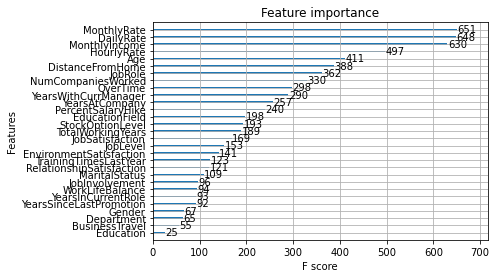

In [544]:
train_data = xgb.DMatrix(x_train, label = y_train)
valid_data= xgb.DMatrix(x_valid, label = y_valid)
test_data = xgb.DMatrix(test)


train = xgb.DMatrix(train.drop('Attrition',axis = 1),label = train['Attrition'])

cv_res= xgb.cv(param,train,num_boost_round=5000,early_stopping_rounds=5000,nfold=10, metrics='auc',show_stdv=True)
print(cv_res)
#cv_res.shape[0]为最佳迭代次数
model = xgb.train(param, train_data,evals = [(train_data,'train'),(valid_data,'valid')],num_boost_round = cv_res.shape[0],
                 early_stopping_rounds =5000,verbose_eval= 25)
predict = model.predict(test_data)



test['Attrition']=predict
print(predict)
test[['Attrition']].to_csv('submit_xgb.csv')

# 显示重要特征

plt.figure(figsize = (20,30))
plot_importance(model)
plt.savefig('importance_')
plt.show()
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import LeaveOneOut
# loo = LeaveOneOut()
# scores = cross_val_score(model,train_data,valid_data, cv = loo)
# print('Number of cv iterations:',len(scores))
# print('Mean accuracy:{:.2f}'.format(scores.mean()))
